In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd

df=pd.read_csv('/content/gdrive/My Drive/600.csv')
df=df.iloc[:51,:4]
df.tail()

,depart_hotel,arrive_airport,depart_airport,arrive_hotel
46,20:58,22:43,21:08,22:38
47,21:12,22:57,21:27,22:47
48,21:26,23:11,21:50,23:10
49,21:40,23:25,22:20,23:40
50,22:00,23:45,22:50,0:10


In [0]:
def to_list_1(column):
  dh=df[column].tolist()
  l=[]
  for i in dh:
    i=i.replace(':','')
    i=((int(i)//100)*60)+(int(i)%100)
    l.append(i)
  return l
depart_hotel=to_list_1('depart_hotel')
arrive_airport=to_list_1('arrive_airport')
depart_airport=to_list_1('depart_airport')
arrive_hotel=to_list_1('arrive_hotel')

print(len(depart_hotel), len(depart_airport))

51 51


In [0]:
def hotel_bus_rest(bus_num):
  # bus_num-=1
  a=[]
  num_through = 0
  while bus_num+7 < len(arrive_hotel):
    if num_through % 2 == 0:
      a.append(depart_airport[bus_num+7] - arrive_airport[bus_num])
      bus_num+=7
    else:
      a.append(depart_hotel[bus_num+6] - arrive_hotel[bus_num])
      bus_num+=6
    num_through+=1
  return a

for i in range(6):
  print("\n #", i+1 ,"bus (depart from hotel) rest_time: \n",hotel_bus_rest(i))


 # 1 bus (depart from hotel) rest_time: 
 [42, 38, 19, 31, 26, 25, 20]

 # 2 bus (depart from hotel) rest_time: 
 [42, 37, 20, 31, 26, 24, 20]

 # 3 bus (depart from hotel) rest_time: 
 [35, 37, 20, 30, 25, 22, 27]

 # 4 bus (depart from hotel) rest_time: 
 [25, 36, 21, 30, 23, 20, 41]

 # 5 bus (depart from hotel) rest_time: 
 [15, 36, 21, 29, 22, 18, 55]

 # 6 bus (depart from hotel) rest_time: 
 [15, 35, 22, 29, 20, 16]


In [0]:
def airport_bus_rest(bus_num):
  # bus_num-=1
  a=[]
  num_through = 0
  while bus_num+6 < len(depart_hotel):
    if num_through % 2 == 0:
      a.append(depart_hotel[bus_num+6] - arrive_hotel[bus_num])
      bus_num+=6
    else:
      a.append(depart_airport[bus_num+7] - arrive_airport[bus_num])
      bus_num+=7
    num_through+=1
  return a

for i in range(7):
  print("\n #", i+1 ,"bus (depart from airport) rest_time: \n",airport_bus_rest(i))


 # 1 bus (depart from airport) rest_time: 
 [41, 16, 35, 22, 28, 19, 14]

 # 2 bus (depart from airport) rest_time: 
 [41, 16, 34, 23, 28, 18, 11]

 # 3 bus (depart from airport) rest_time: 
 [40, 17, 34, 23, 27, 18, 6]

 # 4 bus (depart from airport) rest_time: 
 [40, 17, 33, 24, 27, 17, 9]

 # 5 bus (depart from airport) rest_time: 
 [39, 18, 33, 24, 26, 17, 4]

 # 6 bus (depart from airport) rest_time: 
 [39, 18, 32, 25, 26, 18, 3]

 # 7 bus (depart from airport) rest_time: 
 [38, 19, 32, 25, 25, 19]


In [0]:
# running rate: (고도때문에 5% 소모량 더썼을시) 1.42km/kwh * 100 / 105 = 1.35km/kwh
# charging rate: 3.6kwh/min = x로 설정
# 전체 배터리 가정: 272kwh*0.9 = 244.8kwh = 244.8/x min
# 62km = 62/(1.35*x) min
x=3.61
c_rate=(60*x)/272
entire_battery = 244.8/x
oneway = 62/(1.35*x)
def soc_list(rest,num_of_bus, entire_battery, oneway):
  soc=entire_battery
  soc_list=[]
  rest_list=rest(num_of_bus)
  for i in range(len(rest_list)):
    soc -= oneway
    soc_list.append("%.2f" % float(soc*3.6))
    if rest_list[i]>=10:
      if (rest_list[i]-5)>(entire_battery-soc):
        soc = entire_battery
      else:
        soc += (rest_list[i]-5)
    elif i==(len(rest_list)-1):
      soc-=oneway
      soc_list.append("%.2f" % float(soc*3.6))
  soc -= oneway
  soc_list.append("%.2f" % float(soc*3.6))
  return soc_list
print("c-rate: ",round(c_rate,2))
for i in range(7):
  print("\n #", i+1 ,"bus (depart from airport) rest_time: \n",airport_bus_rest(i))
  print(soc_list(airport_bus_rest,i,entire_battery, oneway))

c-rate:  0.8

 # 1 bus (depart from airport) rest_time: 
 [41, 16, 35, 22, 28, 19, 14]
['198.32', '198.32', '192.12', '198.32', '198.32', '198.32', '198.32', '184.92']

 # 2 bus (depart from airport) rest_time: 
 [41, 16, 34, 23, 28, 18, 11]
['198.32', '198.32', '192.12', '198.32', '198.32', '198.32', '198.32', '174.12']

 # 3 bus (depart from airport) rest_time: 
 [40, 17, 34, 23, 27, 18, 6]
['198.32', '198.32', '195.72', '198.32', '198.32', '198.32', '198.32', '152.52', '106.73']

 # 4 bus (depart from airport) rest_time: 
 [40, 17, 33, 24, 27, 17, 9]
['198.32', '198.32', '195.72', '198.32', '198.32', '198.32', '195.72', '149.93', '104.13']

 # 5 bus (depart from airport) rest_time: 
 [39, 18, 33, 24, 26, 17, 4]
['198.32', '198.32', '198.32', '198.32', '198.32', '198.32', '195.72', '149.93', '104.13']

 # 6 bus (depart from airport) rest_time: 
 [39, 18, 32, 25, 26, 18, 3]
['198.32', '198.32', '198.32', '198.32', '198.32', '198.32', '198.32', '152.52', '106.73']

 # 7 bus (depart fro

In [0]:
for i in range(6):
  print("\n #", i+1 ,"bus (depart from hotel) rest_time: \n",hotel_bus_rest(i))
  print(soc_list(hotel_bus_rest,i,entire_battery, oneway))


 # 1 bus (depart from hotel) rest_time: 
 [42, 38, 19, 31, 26, 25, 20]
['198.32', '198.32', '198.32', '198.32', '198.32', '198.32', '198.32', '198.32']

 # 2 bus (depart from hotel) rest_time: 
 [42, 37, 20, 31, 26, 24, 20]
['198.32', '198.32', '198.32', '198.32', '198.32', '198.32', '198.32', '198.32']

 # 3 bus (depart from hotel) rest_time: 
 [35, 37, 20, 30, 25, 22, 27]
['198.32', '198.32', '198.32', '198.32', '198.32', '198.32', '198.32', '198.32']

 # 4 bus (depart from hotel) rest_time: 
 [25, 36, 21, 30, 23, 20, 41]
['198.32', '198.32', '198.32', '198.32', '198.32', '198.32', '198.32', '198.32']

 # 5 bus (depart from hotel) rest_time: 
 [15, 36, 21, 29, 22, 18, 55]
['198.32', '188.52', '198.32', '198.32', '198.32', '198.32', '198.32', '198.32']

 # 6 bus (depart from hotel) rest_time: 
 [15, 35, 22, 29, 20, 16]
['198.32', '188.52', '198.32', '198.32', '198.32', '198.32', '192.12']


In [0]:
# running rate: (고도때문에 5% 소모량 더썼을시) 1.42km/kwh * 100 / 105 = 1.35km/kwh, (에어컨+일땐,) ((x*1.35)-0.43)/x km/kwh, (히터+일땐,) ((x*1.35)-0.55)/x km/kwh
# charging rate: 3.6kwh/min = x로 설정
# 전체 배터리 가정: 272kwh*0.9 = 244.8 kwh =244.8/x min
# 62km = 62/(1.35*x) min

#############결과
# 에어컨,히터 안쓸땐, chargin rate = 0.35C 까지 가능
# 에어컨은 charging rate = 0.51C까지 가능
# 히터는 charging rate = 0.55C까지 가능

x=3.61
c_rate=(60*x)/272
entire_battery = 244.8/x
oneway = 62/(1.35*x)
oneway_with_airconditioner=62/((x*1.35)-0.43)
oneway_with_heater=62/((x*1.35)-0.55)

def soc_list(rest,num_of_bus, entire_battery, oneway):
  soc=entire_battery
  soc_list=[]
  rest_list=rest(num_of_bus)
  for i in range(len(rest_list)):
    soc -= oneway
    soc_list.append("%d" % int((soc*3.6/272)*100))
    if rest_list[i]>=10:
      if (rest_list[i]-5)>(entire_battery-soc):
        soc = entire_battery
      else:
        soc += (rest_list[i]-5)
    elif i==(len(rest_list)-1):
      soc-=oneway
      soc_list.append("%d" % int((soc*3.6/272)*100))
  soc -= oneway
  soc_list.append("%d" % int((soc*3.6/272)*100))
  return soc_list
print("c-rate: ",round(c_rate,2))
for i in range(7):
  print("\n #", i+1 ,"bus (depart from airport) rest_time: \n",airport_bus_rest(i))
  print("<SOC>\n",soc_list(airport_bus_rest,i,entire_battery, oneway))
  print("<SOC with air_conditioner>\n",soc_list(airport_bus_rest,i,entire_battery, oneway_with_airconditioner))
  print("<SOC with heater>\n",soc_list(airport_bus_rest,i,entire_battery, oneway_with_heater))
  

c-rate:  0.8

 # 1 bus (depart from airport) rest_time: 
 [41, 16, 35, 22, 28, 19, 14]
<SOC>
 ['72', '72', '70', '72', '72', '72', '72', '67']
<SOC with air_conditioner>
 ['71', '71', '67', '71', '71', '71', '71', '64']
<SOC with heater>
 ['70', '70', '66', '70', '70', '70', '70', '63']

 # 2 bus (depart from airport) rest_time: 
 [41, 16, 34, 23, 28, 18, 11]
<SOC>
 ['72', '72', '70', '72', '72', '72', '72', '64']
<SOC with air_conditioner>
 ['71', '71', '67', '71', '71', '71', '70', '59']
<SOC with heater>
 ['70', '70', '66', '70', '70', '70', '68', '57']

 # 3 bus (depart from airport) rest_time: 
 [40, 17, 34, 23, 27, 18, 6]
<SOC>
 ['72', '72', '71', '72', '72', '72', '72', '56', '39']
<SOC with air_conditioner>
 ['71', '71', '68', '71', '71', '71', '70', '51', '33']
<SOC with heater>
 ['70', '70', '67', '70', '70', '70', '68', '50', '31']

 # 4 bus (depart from airport) rest_time: 
 [40, 17, 33, 24, 27, 17, 9]
<SOC>
 ['72', '72', '71', '72', '72', '72', '71', '55', '38']
<SOC with 

In [0]:
x=3.61
entire_battery = 244.8/x
oneway = 62/(1.35*x)
oneway_with_airconditioner=62/((x*1.35)-0.43)
oneway_with_heater=62/((x*1.35)-0.55)

def soc_list(rest,num_of_bus, entire_battery, oneway):
  soc=entire_battery
  soc_list=[]
  rest_list=rest(num_of_bus)
  for i in range(len(rest_list)):
    soc -= oneway
    soc_list.append("%d" % int((soc*3.6/272)*100))
    if rest_list[i]>=10:
      if (rest_list[i]-5)>(entire_battery-soc):
        soc = entire_battery
      else:
        soc += (rest_list[i]-5)
    elif i==(len(rest_list)-1):
      soc-=oneway
      soc_list.append("%d" % int((soc*3.6/272)*100))
  soc -= oneway
  soc_list.append("%d" % int((soc*3.6/272)*100))
  return soc_list

for i in range(6):
  print("\n #", i+1 ,"bus (depart from hotel) rest_time: \n",hotel_bus_rest(i))
  print("<SOC>\n",soc_list(hotel_bus_rest,i,entire_battery, oneway))
  print("<SOC with air_conditioner>\n",soc_list(hotel_bus_rest,i,entire_battery, oneway_with_airconditioner))
  print("<SOC with heater>\n",soc_list(hotel_bus_rest,i,entire_battery, oneway_with_heater))


 # 1 bus (depart from hotel) rest_time: 
 [42, 38, 19, 31, 26, 25, 20]
<SOC>
 ['72', '72', '72', '72', '72', '72', '72', '72']
<SOC with air_conditioner>
 ['71', '71', '71', '71', '71', '71', '71', '71']
<SOC with heater>
 ['70', '70', '70', '70', '70', '70', '70', '70']

 # 2 bus (depart from hotel) rest_time: 
 [42, 37, 20, 31, 26, 24, 20]
<SOC>
 ['72', '72', '72', '72', '72', '72', '72', '72']
<SOC with air_conditioner>
 ['71', '71', '71', '71', '71', '71', '71', '71']
<SOC with heater>
 ['70', '70', '70', '70', '70', '70', '70', '70']

 # 3 bus (depart from hotel) rest_time: 
 [35, 37, 20, 30, 25, 22, 27]
<SOC>
 ['72', '72', '72', '72', '72', '72', '72', '72']
<SOC with air_conditioner>
 ['71', '71', '71', '71', '71', '71', '71', '71']
<SOC with heater>
 ['70', '70', '70', '70', '70', '70', '70', '70']

 # 4 bus (depart from hotel) rest_time: 
 [25, 36, 21, 30, 23, 20, 41]
<SOC>
 ['72', '72', '72', '72', '72', '72', '72', '72']
<SOC with air_conditioner>
 ['71', '71', '71', '71', 

In [0]:
def hotel_bus_rest_section(bus_num):
  # bus_num-=1
  airport=[]
  hotel=[]
  num_through = 0
  while bus_num+7 < len(arrive_hotel):
    if num_through % 2 == 0:
      airport.append((arrive_airport[bus_num],depart_airport[bus_num+7]))
      bus_num+=7
    else:
      hotel.append((arrive_hotel[bus_num],depart_hotel[bus_num+6],))
      bus_num+=6
    num_through+=1
  return airport, hotel

print(hotel_bus_rest_section(1)[0])

[(478, 520), (760, 780), (1014, 1040), (1267, 1287)]


In [0]:
def airport_bus_rest_section(bus_num):
  # bus_num-=1
  airport=[]
  hotel=[]
  num_through = 0
  while bus_num+6 < len(depart_hotel):
    if num_through % 2 == 0:
      hotel.append((arrive_hotel[bus_num],depart_hotel[bus_num+6]))
      bus_num+=6
    else:
      airport.append((arrive_airport[bus_num],depart_airport[bus_num+7]))
      bus_num+=7
    num_through+=1
  return airport, hotel

print(airport_bus_rest_section(1))

([(624, 640), (877, 900), (1131, 1149)], [(478, 519), (738, 772), (998, 1026), (1247, 1258)])


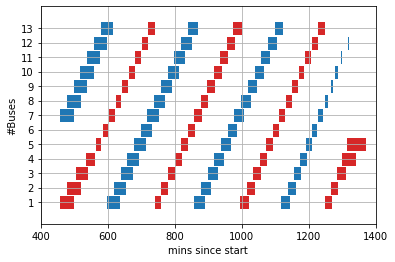

In [0]:
# <간트차트 설명>
# 1~6 bus(depart from hotel)
# 7~13 bus(depart from airport)
# red: airport에서 쉬는시간
# blue: hotel에서 쉬는시간

# 봤을때 한 충전소에 2개의 버스만 겹치는 것으로 보입니다.

import matplotlib.pyplot as plt 

fig, gnt = plt.subplots() 
gnt.set_ylim(0, 150) 
gnt.set_xlim(400, 1400) 
gnt.set_xlabel('mins since start') 
gnt.set_ylabel('#Buses') 
gnt.set_yticks([15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135]) 
gnt.set_yticklabels(['1', '2', '3','4','5','6','7','8','9','10','11','12','13']) 
gnt.grid(True)
def gantt_chart_hotel(section, n):
  alist=[]
  blist=[]
  for i in section(n)[0]:
    alist.append((i[0],i[1]-i[0]))
  gnt.broken_barh(alist, (10*(n+1), 9), facecolors = 'tab:red')
  for i in section(n)[1]:
    blist.append((i[0],i[1]-i[0]))
  gnt.broken_barh(blist, (10*(n+1), 9), facecolors ='tab:blue') 

def gantt_chart_airport(section, n):
  alist=[]
  blist=[]
  for i in section(n)[0]:
    alist.append((i[0],i[1]-i[0]))
  gnt.broken_barh(alist, (10*(n+7), 9), facecolors = 'tab:red')
  for i in section(n)[1]:
    blist.append((i[0],i[1]-i[0]))
  gnt.broken_barh(blist, (10*(n+7), 9), facecolors ='tab:blue') 
for i in range(6):
  gantt_chart_hotel(hotel_bus_rest_section, i)
for i in range(7):
  gantt_chart_airport(airport_bus_rest_section, i)